<h1 align="center">Mobile Money Financial Inclusion Analyzer</h1>


### 1. Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the Mobile Money Financial Inclusion Dataset

In [5]:
df = pd.read_csv('C:/Users/Pc/Desktop/CSA2025/2024_Finaccess_Publicdata.csv')
display(df.head())

C:\Users\Pc\AppData\Local\Temp\ipykernel_5704\324061656.py:1: DtypeWarning: Columns (30,32,59,62,86,96,110,132,147,162,177,237,252,277,279,386,393,395,420,422,461,480,482,484,536,554,567,578,582,584,586,588,597,599,601,614,630,638,640,649,657,659,661,663,672,674,676,678,687,689,700,702,704,715,717,719,721,732,736,745,747,749,758,760,762,771,773,775,784,786,790,798,800,802,810,818,820,822,832,859,902,904,921,922,923,924,925,926,927,928,929,930,949,950,951,952,954,955,966,978,980,982,984,986,992,994,996,998,1002,1004,1006,1008,1010,1012,1014,1016,1018,1020,1022,1024,1026,1028,1030,1032,1034,1038,1040,1042,1044,1046,1048,1050,1052,1065,1077,1086,1088,1090,1094,1096,1108,1119,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193

,interview__key,interview__id,county,A07,A08,A10,Interview_Status,A9i,Z1,A13,...,sacco_redress,mobilemoney_redress,mobilebank_redress,not_registered_mmoney_24,using_someone_acc,insurance_including_NHIF_use,All_Insurance_excluding_NHIF_use,PWD,Latitude,Longitude
0,21-61-43-44,00005e63e7424aa19e63adb071955233,Garissa,225,Urban,1,Household found with competent respondent,Access granted,completed,Male,...,#NULL!,#NULL!,#NULL!,No,#NULL!,Never used,Never used,Without Disability,-0.435423,39.636586
1,87-78-54-60,000718d26f5942998522033a66594b4c,Garissa,223,Urban,3,Household found with competent respondent,Access granted,completed,Male,...,#NULL!,#NULL!,#NULL!,No,#NULL!,Never used,Never used,Without Disability,0.058794,40.305006
2,32-71-19-84,0008721681d2468aa1ef456bba4475dc,Busia,1514,Urban,3,Household found with competent respondent,Access granted,completed,Female,...,#NULL!,#NULL!,#NULL!,No,#NULL!,Never used,Never used,Without Disability,0.636836,34.277390
3,48-18-78-99,00099e961d49470585c1a7f49fa3b7fb,Kiambu,796,Urban,3,Household found with competent respondent,Access granted,completed,Male,...,#NULL!,#NULL!,#NULL!,No,#NULL!,Never used,Never used,Without Disability,-1.251917,36.719076
4,50-82-98-89,000bb72e959b4dd48443da902c01e920,Murang'a,763,Urban,16,Household found with competent respondent,Access granted,completed,Female,...,#NULL!,#NULL!,#NULL!,No,Yes,Never used,Never used,Without Disability,-0.795820,37.131085


### 3. Visualizing Mobile Money Transactional Value Trends in Eastern Africa (2001–2024)

#### 3.1 Loading Transactional Value Data for Analysis

In [7]:
# Load the transactional value data
df_transactional_value = pd.read_csv('C:/Users/Pc/Desktop/CSA2025/Group-10-Mobile-Money-Financial-Inclusion-Analyzer/data/GLOBAL MOBILE MONEY DATASET.csv')


#### 3.2 Extracting Transactional Value Data for Eastern Africa

In [8]:
# Extract the row for Eastern Africa from df_transactional_value
eastern_africa_row = df_transactional_value[
    (df_transactional_value['Geo_name'] == 'Eastern Africa') &
    (df_transactional_value['Metric'] == 'Mobile Money transactional value')
]

#### 3.3 Cleaning and Converting Transactional Value Data for Time Series Analysis

In [10]:
# Select only the columns that are dates
date_columns = [col for col in eastern_africa_row.columns if '/' in col]

# Get the values and convert to numeric with improved cleaning
values_raw = eastern_africa_row[date_columns].iloc[0]
values_cleaned = (
    values_raw.astype(str)  # Convert to string first
    .str.strip()  # Remove leading/trailing whitespace
    .replace('', None)  # Replace empty strings with None
    .replace('-', None)  # Replace dash with None
    .replace('nan', None)  # Replace 'nan' strings with None
    .str.replace(',', '', regex=False)  # Remove commas from numbers
)

# Convert to numeric, handling any remaining non-numeric values
values = pd.to_numeric(values_cleaned, errors='coerce')

#### 3.4 Removing NaN Values and Corresponding Date Columns for Plotting

In [11]:
# Remove any NaN values and corresponding date columns for plotting
valid_mask = ~values.isna()
values_plot = values[valid_mask]
dates_plot = [date_columns[i] for i in range(len(date_columns)) if valid_mask.iloc[i]]

#### 3.5 Plotting Mobile Money Transactional Value Trends in Eastern Africa (2001–2024)

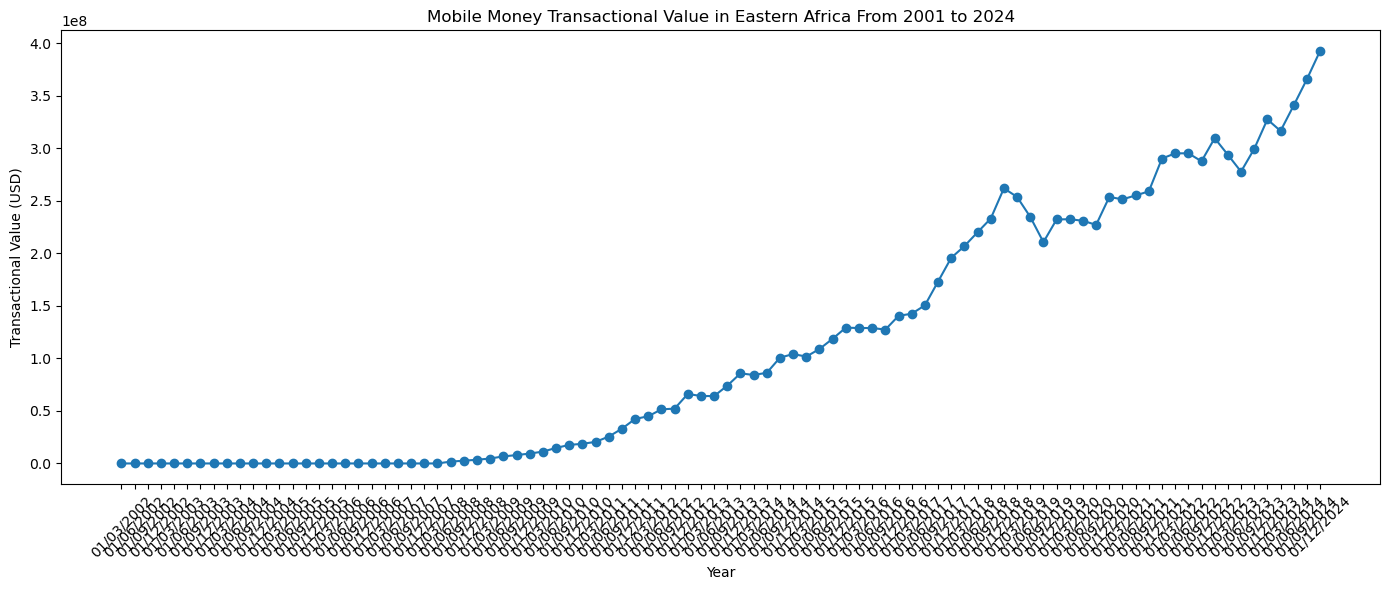

In [12]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(dates_plot, values_plot, marker='o')
plt.title('Mobile Money Transactional Value in Eastern Africa From 2001 to 2024')
plt.xlabel('Year')
plt.ylabel('Transactional Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3.6 Preparing Data and Building Time Series Prediction Models (Random Forest & XGBoost)

In [ ]:

# Prepare the data for time series prediction
# Convert date columns to years (as integers)
years = np.array([int(date.split('/')[0]) for date in dates_plot]).reshape(-1, 1)
values_arr = values_plot.values

# Predict for the next year that is (2025)
future_years = np.arange(years[-1][0] + 1, years[-1][0] + 6).reshape(-1, 1)

# Split data for training
X_train, X_test, y_train, y_test = train_test_split(years, values_arr, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(np.vstack([years, future_years]))
# Print predictions for the next year that is (2025)
print("Random Forest Predictions for the next year (2025):")
for year, pred in zip(future_years.flatten(), rf_pred[-1:]):
    print(f"{year}: {pred:.2f}")

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(np.vstack([years, future_years]))
# Print predictions for the next year that is (2025)
print("\nXGBoost Predictions for the next year (2025):")
for year, pred in zip(future_years.flatten(), xgb_pred[-1:]):
    print(f"{year}: {pred:.2f}")

Random Forest Predictions for the next year (2025):
2: 118738846.48

XGBoost Predictions for the next year (2025):
2: 119044552.00


#### 3.7 Evaluating Model Performance: Random Forest vs XGBoost on Test Set

In [ ]:
# Predict on test set data
rf_test_pred = rf.predict(X_test)
xgb_test_pred = xgb.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_test_pred)
xgb_mse = mean_squared_error(y_test, xgb_test_pred)

rf_r2 = r2_score(y_test, rf_test_pred)
xgb_r2 = r2_score(y_test, xgb_test_pred)

print(f"Random Forest - MSE: {rf_mse:.2f}, R2: {rf_r2:.4f}")
print(f"XGBoost      - MSE: {xgb_mse:.2f}, R2: {xgb_r2:.4f}")

if rf_mse < xgb_mse:
    print("Random Forest is more accurate on the test set.")
else:
    print("XGBoost is more accurate on the test set.")
    
    

Random Forest - MSE: 13615454010651622.00, R2: -0.0643
XGBoost      - MSE: 13633079200993462.00, R2: -0.0656
Random Forest is more accurate on the test set.
